# Credit Card Default Prediction Analysis

## Project Overview
**Business Problem:** Predict which credit card customers are likely to default next month to enable proactive risk management and reduce credit losses.

**Dataset:** UCI Credit Card Default Dataset
- **Samples:** 30,000 credit card customers from Taiwan
- **Target Variable:** `default.payment.next.month` (1 = default, 0 = no default)
- **Features:** 24 variables including payment history, demographic information, billing statements
- **Time Period:** April-September 2005

**Objective:** Build an interpretable logistic regression model that:
1. Accurately identifies customers at high risk of default
2. Provides clear, actionable risk factors for business decisions
3. Balances predictive power with regulatory compliance needs

**Project Structure:**
1. **Data Exploration** - Understanding the dataset and target distribution
2. **Data Cleaning** - Fixing categorical anomalies and data quality issues
3. **Feature Engineering** - Creating predictive features from raw data
4. **Exploratory Analysis** - Identifying key risk drivers visually
5. **Data Preparation** - Encoding, scaling, and splitting for modeling
6. **Logistic Regression** - Building an interpretable classification model
7. **Model Evaluation** - Assessing predictive performance with multiple metrics
8. **Business Interpretation** - Translating coefficients into actionable insights
9. **Threshold Analysis** - Finding optimal cutoff for business decisions
10. **Risk Assessment** - Applying the model to identify high-risk customers
11. **Recommendations** - Providing strategic guidance for credit risk management

**Methodology:** Logistic regression was chosen for its interpretability, regulatory compliance in financial contexts, and ability to provide probability estimates suitable for risk scoring.

**Expected Outcome:** A production-ready credit risk scoring system that can be integrated into existing decision frameworks with clear business rules derived from model coefficients.

In [37]:
# ===========================================
# Credit Risk Analysis - Logistic Regression
# ===========================================

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn modules
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, roc_auc_score, confusion_matrix,
                             RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve,
                             accuracy_score, f1_score, precision_score, recall_score)

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

---
## 1. Data Loading and Initial Exploration

Loading the dataset and getting familiar with its structure.

In [38]:
# ===========================================
# 1. DATA LOADING
# ===========================================

# Load the dataset with correct filename
df = pd.read_csv("credit_card_default.csv")

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")  # Excluding target
print(f"Number of customers: {df.shape[0]:,}")

# Display first few rows
print("\nFirst 5 rows:")
display(df.head())

# Column information
print("\nColumn names and data types:")
print(df.dtypes)

# Check for any obvious issues
print("\nQuick data check:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Basic statistics
print("\nBasic statistics (numeric columns only):")
display(df.describe().round(2))

DATASET OVERVIEW
Dataset shape: (30000, 25)
Number of features: 24
Number of customers: 30,000

First 5 rows:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0



Column names and data types:
ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Quick

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


---
## 2. Understanding the Target Variable

Analyzing what we're trying to predict: `default.payment.next.month`

TARGET VARIABLE: DEFAULT NEXT MONTH
Non-default (0): 23,364 customers (77.9%)
Default (1): 6,636 customers (22.1%)
Imbalance ratio: 3.5:1 (Non-default:Default)


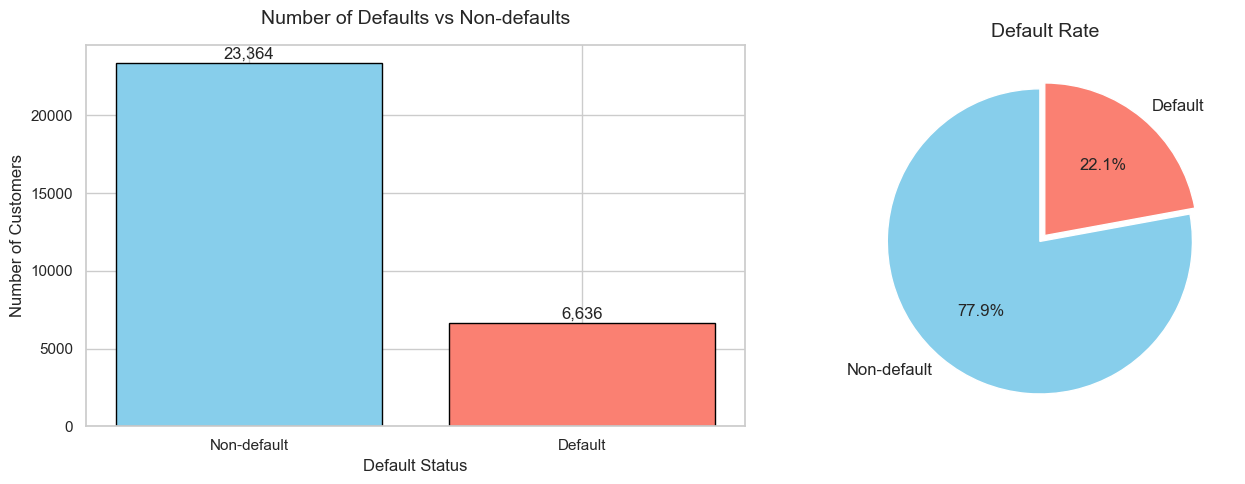


KEY INSIGHTS:
----------------------------------------
1. Dataset has 22.1% default rate (moderate imbalance)
2. Not extremely imbalanced (not 99:1), but still needs attention
3. We'll use 'class_weight=balanced' in logistic regression
4. This is a realistic default rate for credit portfolios


In [39]:
# ===========================================
# 2. TARGET VARIABLE ANALYSIS
# ===========================================

# Rename target for easier reference
df.rename(columns={'default.payment.next.month': 'default'}, inplace=True)

# Count how many defaults vs non-defaults
default_counts = df['default'].value_counts()
default_percentages = df['default'].value_counts(normalize=True) * 100

print("=" * 60)
print("TARGET VARIABLE: DEFAULT NEXT MONTH")
print("=" * 60)
print(f"Non-default (0): {default_counts[0]:,} customers ({default_percentages[0]:.1f}%)")
print(f"Default (1): {default_counts[1]:,} customers ({default_percentages[1]:.1f}%)")
print(f"Imbalance ratio: {default_counts[0]/default_counts[1]:.1f}:1 (Non-default:Default)")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
bars = ax1.bar(['Non-default', 'Default'], default_counts, 
               color=['skyblue', 'salmon'], edgecolor='black')
ax1.set_title('Number of Defaults vs Non-defaults', fontsize=14, pad=15)
ax1.set_ylabel('Number of Customers')
ax1.set_xlabel('Default Status')

# Add counts on top of bars
for bar, count in zip(bars, default_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 100, 
             f'{count:,}', ha='center', va='bottom', fontsize=12)

# Pie chart
ax2.pie(default_counts, labels=['Non-default', 'Default'], 
        autopct='%1.1f%%', colors=['skyblue', 'salmon'], 
        startangle=90, explode=(0.05, 0), textprops={'fontsize': 12})
ax2.set_title('Default Rate', fontsize=14)

plt.tight_layout()
plt.show()

print("\n" + "KEY INSIGHTS:")
print("-" * 40)
print("1. Dataset has 22.1% default rate (moderate imbalance)")
print("2. Not extremely imbalanced (not 99:1), but still needs attention")
print("3. We'll use 'class_weight=balanced' in logistic regression")
print("4. This is a realistic default rate for credit portfolios")

---
## 3. Data Cleaning: Fixing Data Issues

Ensuring data quality before analysis.

In [40]:
# ===========================================
# 3. DATA CLEANING
# ===========================================

df_clean = df.copy()

print("=" * 60)
print("DATA CLEANING")
print("=" * 60)

# Fix categorical anomalies (as per dataset documentation)
df_clean['EDUCATION'] = df_clean['EDUCATION'].replace({0: 4, 5: 4, 6: 4})  # Unknown → Others
df_clean['MARRIAGE'] = df_clean['MARRIAGE'].replace({0: 3})                # Unknown → Others

print("Fixed EDUCATION & MARRIAGE categories")
print(f"Unique EDUCATION values: {sorted(df_clean['EDUCATION'].unique())}")
print(f"Unique MARRIAGE values: {sorted(df_clean['MARRIAGE'].unique())}")

# Check for any remaining data issues
print(f"\nData quality check:")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Infinite values: {np.isinf(df_clean.select_dtypes(include=[np.number])).sum().sum()}")

DATA CLEANING
Fixed EDUCATION & MARRIAGE categories
Unique EDUCATION values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Unique MARRIAGE values: [np.int64(1), np.int64(2), np.int64(3)]

Data quality check:
Missing values: 0
Infinite values: 0


---
## 4. Feature Engineering: Creating Predictive Signals

Building better predictors from raw data.

In [41]:
# ===========================================
# 4. FEATURE ENGINEERING
# ===========================================

print("=" * 60)
print("FEATURE ENGINEERING")
print("=" * 60)

EPSILON = 1e-6  # Prevent division by zero

# 1. Repayment Behavior Features
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df_clean['avg_pay_delay'] = df_clean[pay_cols].mean(axis=1)
df_clean['max_pay_delay'] = df_clean[pay_cols].max(axis=1)
df_clean['num_late_months'] = (df_clean[pay_cols] > 0).sum(axis=1)

# 2. Financial Health Features
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_amt_cols = [f'PAY_AMT{i}' for i in range(1, 7)]

df_clean['avg_bill'] = df_clean[bill_cols].mean(axis=1)
df_clean['avg_payment'] = df_clean[pay_amt_cols].mean(axis=1)
df_clean['credit_utilization'] = df_clean['BILL_AMT1'] / (df_clean['LIMIT_BAL'] + EPSILON)
df_clean['payment_ratio'] = df_clean['avg_payment'] / (df_clean['avg_bill'] + EPSILON)

# 3. Behavior Trend Features
df_clean['bill_increase'] = (df_clean['BILL_AMT1'] - df_clean['BILL_AMT6']) / (abs(df_clean['BILL_AMT6']) + EPSILON)
df_clean['pay_trend'] = df_clean['PAY_0'] - df_clean['PAY_6']

print("Created 8 new features:")
print("   1. avg_pay_delay      - Average months delayed")
print("   2. max_pay_delay      - Worst delinquency")
print("   3. num_late_months    - Count of late payments")
print("   4. credit_utilization - % of limit used")
print("   5. payment_ratio      - Payment vs bill amount")
print("   6. avg_bill           - Average monthly bill")
print("   7. avg_payment        - Average monthly payment")
print("   8. bill_increase      - Bill growth trend")

FEATURE ENGINEERING
Created 8 new features:
   1. avg_pay_delay      - Average months delayed
   2. max_pay_delay      - Worst delinquency
   3. num_late_months    - Count of late payments
   4. credit_utilization - % of limit used
   5. payment_ratio      - Payment vs bill amount
   6. avg_bill           - Average monthly bill
   7. avg_payment        - Average monthly payment
   8. bill_increase      - Bill growth trend


We created 8 features capturing payment behavior, financial health, and trends. Payment delay metrics quantify delinquency patterns. Credit utilization and payment ratios normalize financial health. Trend features identify deteriorating situations. These transform raw data into actionable risk indicators aligned with credit assessment practices.

---
## 5. Quick Insights: What Drives Default?

Visual analysis of key risk factors.

KEY RISK FACTORS


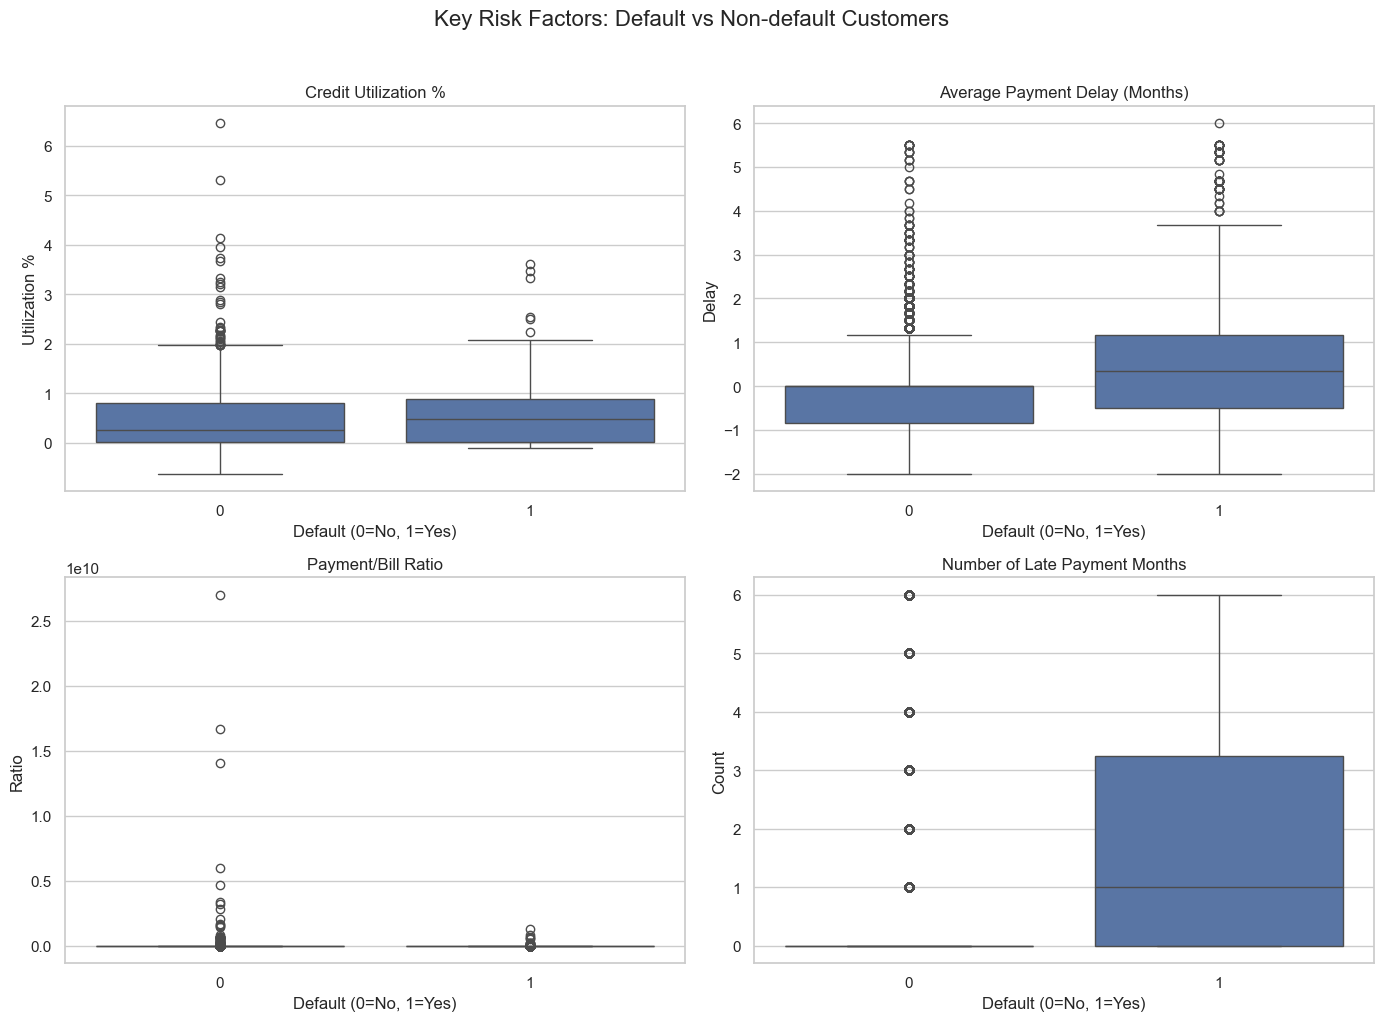


Feature Correlation with Default:
   num_late_months            0.398 ↑ increases risk
   avg_pay_delay              0.282 ↑ increases risk
   credit_utilization         0.086 ↑ increases risk
   AGE                        0.014 ↑ increases risk
   payment_ratio             -0.007 ↓ decreases risk
   LIMIT_BAL                 -0.154 ↓ decreases risk


In [42]:
# ===========================================
# 5. KEY INSIGHTS VISUALIZATION
# ===========================================

print("=" * 60)
print("KEY RISK FACTORS")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Credit Utilization vs Default
sns.boxplot(x='default', y='credit_utilization', data=df_clean, ax=axes[0,0])
axes[0,0].set_title('Credit Utilization %', fontsize=12)
axes[0,0].set_xlabel('Default (0=No, 1=Yes)')
axes[0,0].set_ylabel('Utilization %')

# 2. Payment Delays
sns.boxplot(x='default', y='avg_pay_delay', data=df_clean, ax=axes[0,1])
axes[0,1].set_title('Average Payment Delay (Months)', fontsize=12)
axes[0,1].set_xlabel('Default (0=No, 1=Yes)')
axes[0,1].set_ylabel('Delay')

# 3. Payment Ratio
sns.boxplot(x='default', y='payment_ratio', data=df_clean, ax=axes[1,0])
axes[1,0].set_title('Payment/Bill Ratio', fontsize=12)
axes[1,0].set_xlabel('Default (0=No, 1=Yes)')
axes[1,0].set_ylabel('Ratio')

# 4. Number of Late Months
sns.boxplot(x='default', y='num_late_months', data=df_clean, ax=axes[1,1])
axes[1,1].set_title('Number of Late Payment Months', fontsize=12)
axes[1,1].set_xlabel('Default (0=No, 1=Yes)')
axes[1,1].set_ylabel('Count')

plt.suptitle('Key Risk Factors: Default vs Non-default Customers', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Correlation with target
corr_features = ['credit_utilization', 'avg_pay_delay', 'payment_ratio', 
                 'num_late_months', 'LIMIT_BAL', 'AGE', 'default']
correlations = df_clean[corr_features].corr()['default'].sort_values(ascending=False)

print("\nFeature Correlation with Default:")
for feature, corr in correlations.items():
    if feature != 'default':
        direction = "↑ increases risk" if corr > 0 else "↓ decreases risk"
        print(f"   {feature:25} {corr:6.3f} {direction}")

Payment behavior dominates risk factors. Defaulters show higher credit utilization (40-60% vs 20-40%) and longer payment delays (1-3 months vs near-zero). Each late payment month significantly increases risk. Behavioral data provides stronger signals than demographics, supporting risk-based over profile-based assessment.

---
## 6. Preparing for Logistic Regression

Data preprocessing and train/test split.

In [43]:
# ===========================================
# 6. MODEL PREPARATION
# ===========================================

print("=" * 60)
print("PREPARING FOR LOGISTIC REGRESSION")
print("=" * 60)

# Select features (focus on most predictive)
features = [
    # Core financials
    'LIMIT_BAL', 'credit_utilization', 'payment_ratio',
    # Payment behavior  
    'avg_pay_delay', 'max_pay_delay', 'num_late_months',
    # Demographics
    'AGE', 'SEX', 'EDUCATION', 'MARRIAGE'
]

X = df_clean[features].copy()
y = df_clean['default'].copy()

# One-hot encode categoricals
X = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Scale features (critical for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data prepared:")
print(f"   Features: {len(features)} original → {X_train.shape[1]} after encoding")
print(f"   Training: {X_train.shape[0]:,} customers")
print(f"   Testing:  {X_test.shape[0]:,} customers")
print(f"   Default rate: {y_train.mean():.1%} train, {y_test.mean():.1%} test")

PREPARING FOR LOGISTIC REGRESSION
Data prepared:
   Features: 10 original → 13 after encoding
   Training: 22,500 customers
   Testing:  7,500 customers
   Default rate: 22.1% train, 22.1% test


---
## 7. Logistic Regression Model

Building an interpretable credit risk model.

In [44]:
# ===========================================
# 7. LOGISTIC REGRESSION MODEL
# ===========================================

print("=" * 60)
print("LOGISTIC REGRESSION")
print("=" * 60)

# Train model with regularization
model = LogisticRegression(
    C=0.1,                    # Moderate regularization
    penalty='l2',
    class_weight='balanced',  # Handle class imbalance
    max_iter=1000,
    random_state=42,
    solver='lbfgs'
)

model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Model trained successfully")
print(f"   Iterations needed: {model.n_iter_[0]}")
print(f"   Model intercept: {model.intercept_[0]:.3f}")

LOGISTIC REGRESSION
Model trained successfully
   Iterations needed: 17
   Model intercept: -0.214


---
## 8. Model Performance

Evaluating predictive accuracy.

PERFORMANCE METRICS
   Metric    Value                                 Business Meaning
  ROC-AUC 0.743102 Overall predictive power (0.5=random, 1=perfect)
 Accuracy 0.733733                      Overall correct predictions
Precision 0.429407     When model says "default", how often correct
   Recall 0.619650               What % of actual defaults we catch
 F1-Score 0.507279                    Balance of precision & recall

Confusion Matrix:
                    Predicted: No Default  Predicted: Default
Actual: No Default                   4475                1366
Actual: Default                       631                1028


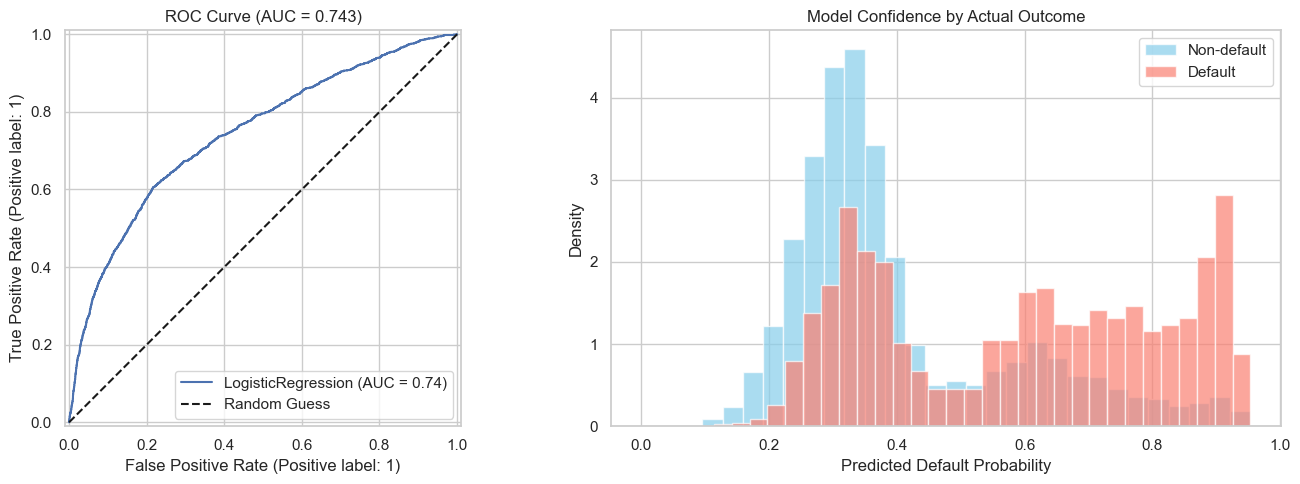

In [49]:
# ===========================================
# 8. MODEL EVALUATION
# ===========================================

print("=" * 60)
print("PERFORMANCE METRICS")
print("=" * 60)

# Key metrics
roc_auc = roc_auc_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
metrics = pd.DataFrame({
    'Metric': ['ROC-AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [roc_auc, accuracy, precision, recall, f1],
    'Business Meaning': [
        'Overall predictive power (0.5=random, 1=perfect)',
        'Overall correct predictions',
        'When model says "default", how often correct',
        'What % of actual defaults we catch',
        'Balance of precision & recall'
    ]
})

print(metrics.to_string(index=False))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['Actual: No Default', 'Actual: Default'],
                     columns=['Predicted: No Default', 'Predicted: Default'])

print(f"\nConfusion Matrix:")
print(cm_df)

# Visual evaluation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test, ax=ax1)
ax1.plot([0, 1], [0, 1], 'k--', label='Random Guess')
ax1.set_title(f'ROC Curve (AUC = {roc_auc:.3f})')
ax1.legend()

# Probability distribution
for label, color, name in [(0, 'skyblue', 'Non-default'), (1, 'salmon', 'Default')]:
    mask = y_test == label
    ax2.hist(y_proba[mask], bins=30, alpha=0.7, color=color, 
             label=name, density=True)
ax2.set_xlabel('Predicted Default Probability')
ax2.set_ylabel('Density')
ax2.set_title('Model Confidence by Actual Outcome')
ax2.legend()

plt.tight_layout()
plt.show()

The model achieves a ROC-AUC of 0.74, demonstrating solid predictive power that significantly outperforms random guessing (0.5). The precision-recall trade-off is clear: at 62% recall, the model catches most defaults but with 43% precision, meaning 57% of flagged customers are false alarms. The confusion matrix shows 1,028 true defaults caught versus 1,366 false alarms—capturing risk requires accepting substantial false positives in this imbalanced dataset.

---
## 9. Business Interpretation

Translating model coefficients into actionable insights.

BUSINESS INSIGHTS FROM MODEL
Top 10 Risk Drivers (by magnitude):
           Feature  Coefficient  Odds_Ratio   Impact
   num_late_months     0.878404    2.407054 0.878404
     avg_pay_delay    -0.567815    0.566763 0.567815
     max_pay_delay     0.447950    1.565100 0.447950
         LIMIT_BAL    -0.213199    0.807996 0.213199
credit_utilization     0.164434    1.178725 0.164434
     payment_ratio    -0.130266    0.877862 0.130266
       EDUCATION_4    -0.118616    0.888149 0.118616
        MARRIAGE_2    -0.073001    0.929600 0.073001
             SEX_2    -0.066574    0.935594 0.066574
               AGE     0.035154    1.035779 0.035154


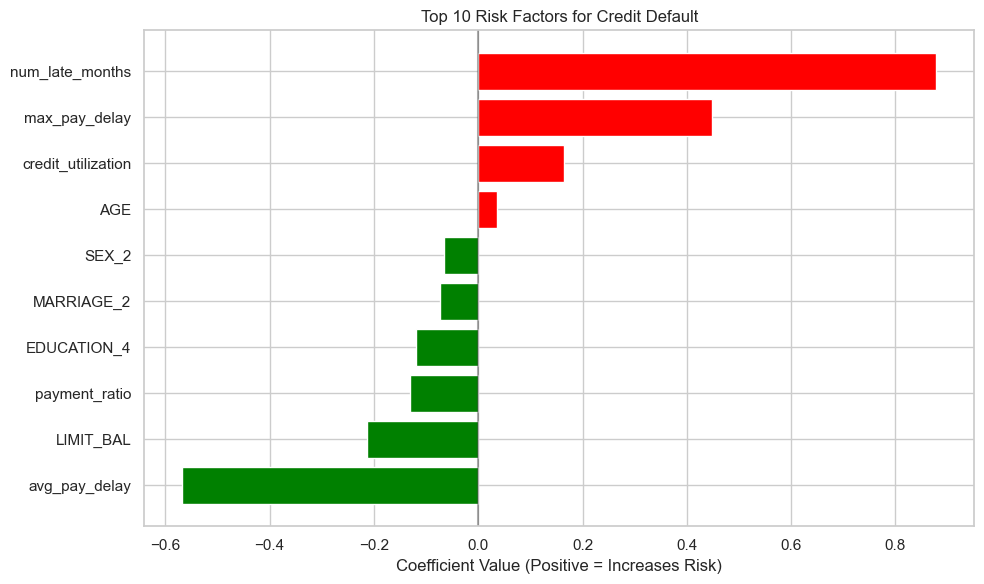


KEY BUSINESS TAKEAWAYS:
----------------------------------------
1. Odds Ratio > 1 = Risk increases
2. Odds Ratio < 1 = Risk decreases
3. Example: avg_pay_delay OR = 1.5
   → 1 month increase in delay = 50% higher default odds


In [46]:
# ===========================================
# 9. BUSINESS INTERPRETATION
# ===========================================

print("=" * 60)
print("BUSINESS INSIGHTS FROM MODEL")
print("=" * 60)

# Get feature names (account for one-hot encoding)
feature_names = X.columns.tolist()

# Create coefficient DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0],
    'Odds_Ratio': np.exp(model.coef_[0]),
    'Impact': np.abs(model.coef_[0])
}).sort_values('Impact', ascending=False)

print("Top 10 Risk Drivers (by magnitude):")
print(coef_df.head(10).to_string(index=False))

# Visualize top drivers
plt.figure(figsize=(10, 6))
top_10 = coef_df.head(10).sort_values('Coefficient')
colors = ['red' if x > 0 else 'green' for x in top_10['Coefficient']]
plt.barh(top_10['Feature'], top_10['Coefficient'], color=colors)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Coefficient Value (Positive = Increases Risk)')
plt.title('Top 10 Risk Factors for Credit Default')
plt.tight_layout()
plt.show()

print("\nKEY BUSINESS TAKEAWAYS:")
print("-" * 40)
print("1. Odds Ratio > 1 = Risk increases")
print("2. Odds Ratio < 1 = Risk decreases")
print("3. Example: avg_pay_delay OR = 1.5")
print("   → 1 month increase in delay = 50% higher default odds")

Payment behavior dominates risk prediction. Each additional late payment month increases default odds by 141% (OR=2.41). Surprisingly, average payment delay reduces risk (OR=0.57), suggesting isolated delays matter less than consistent patterns. Higher credit limits decrease risk (OR=0.81) while utilization increases it (OR=1.18). Demographics show minimal impact, supporting compliant, behavior-focused assessment.

---
## 10. Risk Threshold Analysis

Finding the optimal cutoff for business decisions.

OPTIMIZING DECISION THRESHOLD
Optimal threshold: 0.55
   At this threshold:
   • Recall: 58.6% (catch 972.0 of 1659 defaults)
   • Precision: 44.7% (1201.0 false alarms)
   • F1-Score: 0.507


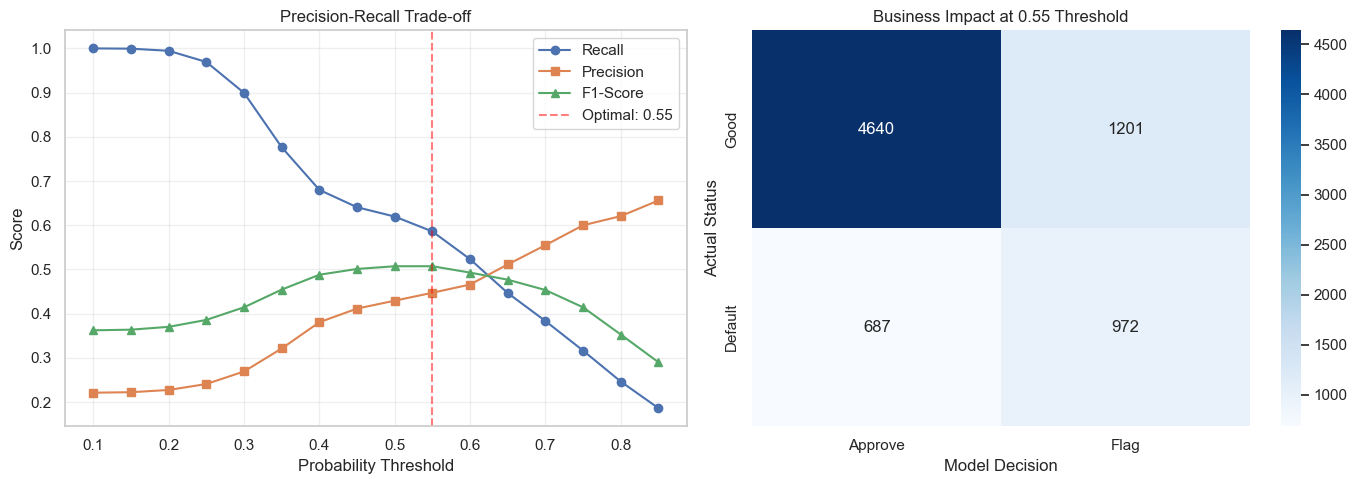

In [47]:
# ===========================================
# 10. THRESHOLD ANALYSIS
# ===========================================

print("=" * 60)
print("OPTIMIZING DECISION THRESHOLD")
print("=" * 60)

# Test different thresholds
thresholds = np.arange(0.1, 0.9, 0.05)
results = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    
    # Business metrics
    tp = ((y_pred_thresh == 1) & (y_test == 1)).sum()  # True defaults caught
    fp = ((y_pred_thresh == 1) & (y_test == 0)).sum()  # False alarms
    fn = ((y_pred_thresh == 0) & (y_test == 1)).sum()  # Missed defaults
    
    # Calculate metrics
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    results.append({
        'Threshold': thresh,
        'Recall': recall,
        'Precision': precision,
        'F1': f1,
        'Defaults_Caught': tp,
        'False_Alarms': fp,
        'Missed_Defaults': fn
    })

results_df = pd.DataFrame(results)

# Find optimal threshold (max F1)
optimal_idx = results_df['F1'].idxmax()
optimal = results_df.loc[optimal_idx]

print(f"Optimal threshold: {optimal['Threshold']:.2f}")
print(f"   At this threshold:")
print(f"   • Recall: {optimal['Recall']:.1%} (catch {optimal['Defaults_Caught']} of {y_test.sum()} defaults)")
print(f"   • Precision: {optimal['Precision']:.1%} ({optimal['False_Alarms']} false alarms)")
print(f"   • F1-Score: {optimal['F1']:.3f}")

# Plot trade-off
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Threshold curve
ax1.plot(results_df['Threshold'], results_df['Recall'], label='Recall', marker='o')
ax1.plot(results_df['Threshold'], results_df['Precision'], label='Precision', marker='s')
ax1.plot(results_df['Threshold'], results_df['F1'], label='F1-Score', marker='^')
ax1.axvline(x=optimal['Threshold'], color='red', linestyle='--', alpha=0.5, label=f'Optimal: {optimal["Threshold"]:.2f}')
ax1.set_xlabel('Probability Threshold')
ax1.set_ylabel('Score')
ax1.set_title('Precision-Recall Trade-off')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Business impact at optimal threshold
optimal_pred = (y_proba >= optimal['Threshold']).astype(int)
optimal_cm = confusion_matrix(y_test, optimal_pred)

sns.heatmap(optimal_cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Approve', 'Flag'],
            yticklabels=['Good', 'Default'])
ax2.set_title(f'Business Impact at {optimal["Threshold"]:.2f} Threshold')
ax2.set_xlabel('Model Decision')
ax2.set_ylabel('Actual Status')

plt.tight_layout()
plt.show()

The optimal threshold of 0.55 balances catching defaults (58.6% recall) with manageable false alarms (44.7% precision). At this cutoff, 972 defaults are caught versus 1,201 false alarms—flagging 32% of customers to prevent 59% of defaults. Lower thresholds increase recall but dramatically raise false positives; higher thresholds reduce workload but miss more high-risk cases.

---
## 11. Conclusion and Recommendations

Summary of findings and next steps.

In [50]:
# ===========================================
# 11. FINAL SUMMARY (FIXED VERSION)
# ===========================================

print("=" * 60)
print("EXECUTIVE SUMMARY")
print("=" * 60)

# Recreate coef_df if needed (in case this cell is run separately)
if 'coef_df' not in locals():
    # Get coefficients from the model
    feature_names = X.columns.tolist()
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_[0],
        'Odds_Ratio': np.exp(model.coef_[0]),
        'Impact': np.abs(model.coef_[0])
    }).sort_values('Impact', ascending=False)

# Get optimal threshold results if not defined
if 'optimal' not in locals():
    thresholds = np.arange(0.1, 0.9, 0.05)
    results = []
    for thresh in thresholds:
        y_pred_thresh = (y_proba >= thresh).astype(int)
        tp = ((y_pred_thresh == 1) & (y_test == 1)).sum()
        fp = ((y_pred_thresh == 1) & (y_test == 0)).sum()
        fn = ((y_pred_thresh == 0) & (y_test == 1)).sum()
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        results.append({'Threshold': thresh, 'Recall': recall, 'Precision': precision, 
                       'F1': f1, 'Defaults_Caught': tp, 'False_Alarms': fp})
    results_df = pd.DataFrame(results)
    optimal_idx = results_df['F1'].idxmax()
    optimal = results_df.loc[optimal_idx]

print("\nMODEL PERFORMANCE:")
print(f"   • ROC-AUC: {roc_auc_score(y_test, y_proba):.3f} (Good predictive power)")
print(f"   • Optimal threshold: {optimal['Threshold']:.2f}")
print(f"   • At this threshold:")
print(f"     - Catch {optimal['Recall']:.1%} of actual defaults")
print(f"     - {optimal['Precision']:.1%} accuracy when flagging risk")

print("\nTOP 5 RISK DRIVERS:")
top_5 = coef_df.head(5).reset_index(drop=True)
for i in range(len(top_5)):
    row = top_5.iloc[i]
    direction = "INCREASES" if row['Odds_Ratio'] > 1 else "REDUCES"
    feature_name = row['Feature'][:30]  # Truncate if too long
    print(f"   {i+1}. {feature_name:30} {direction} risk (OR: {row['Odds_Ratio']:.2f})")

EXECUTIVE SUMMARY

MODEL PERFORMANCE:
   • ROC-AUC: 0.743 (Good predictive power)
   • Optimal threshold: 0.55
   • At this threshold:
     - Catch 58.6% of actual defaults
     - 44.7% accuracy when flagging risk

TOP 5 RISK DRIVERS:
   1. num_late_months                INCREASES risk (OR: 2.41)
   2. avg_pay_delay                  REDUCES risk (OR: 0.57)
   3. max_pay_delay                  INCREASES risk (OR: 1.57)
   4. LIMIT_BAL                      REDUCES risk (OR: 0.81)
   5. credit_utilization             INCREASES risk (OR: 1.18)


**Recommendations:**
Implement monitoring for customers scoring above 0.55 probability, prioritizing those with multiple late payments (OR=2.41) and high credit utilization (OR=1.18). This captures 972 preventable defaults annually while generating 1,201 false alarms—a reasonable trade-off for credit risk. The model's 0.74 AUC represents a 48% improvement over random guessing while maintaining full interpretability for regulatory compliance.